In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
tf.keras.backend.set_floatx('float64')
from misc import *
from collections import deque
from nets import Q2, Actor
import random

In [ ]:

class Q2(tf.keras.Model):
    def __init__(self, valreg=0):
        super(Q2,self).__init__()

        self.l1 = Dense(30, input_shape=(1,),kernel_initializer=tf.random_uniform_initializer(),
        bias_initializer = tf.random_uniform_initializer(),
        kernel_regularizer=tf.keras.regularizers.l1(valreg),
    activity_regularizer=tf.keras.regularizers.l2(valreg))
        
        self.l5 = Dense(2, kernel_regularizer=tf.keras.regularizers.l1(valreg),
    activity_regularizer=tf.keras.regularizers.l2(valreg),
    kernel_initializer=tf.random_uniform_initializer(),
    bias_initializer = tf.random_uniform_initializer())

    def call(self, input):
        feat = tf.nn.sigmoid(self.l1(input))
        feat = tf.nn.softmax(self.l5(feat))
        return feat
        
    def predict(self, history_one):
        inp = np.expand_dims(history_one, axis=0)
        return np.squeeze(self(inp).numpy())

    def __str__(self):
        return self.name


In [60]:

class Q(tf.keras.Model):
    def __init__(self, valreg=0):
        super(Q,self).__init__()

        self.l1 = Dense(30, input_shape=(1,))
        
        self.l5 = Dense(2)

    def call(self, input):
        feat = tf.nn.sigmoid(self.l1(input))
        feat = tf.nn.softmax(self.l5(feat))
        return feat
        
    def predict(self, history_one):
        inp = np.expand_dims(history_one, axis=0)
        return np.squeeze(self(inp).numpy())

    def __str__(self):
        return self.name


In [73]:
def create_dataset_guess(size_dataset=10**3, splits=1):
    dataset = []
    for i in range(size_dataset):
        ph = np.random.choice([-1,1],1)[0]
        b=-.7
        p0 = Prob(ph*0.4, b, 0)
        outcome = np.random.choice([0.,0.], 1, p=[p0,1-p0])[0]
        po1=np.sum([Prob(pp*0.4,b,outcome) for pp in [-1,1]])
        #probrew = Prob(action_guess*0.4, b, outcome)/po1  #UNKNOWN TO AGENT OF COURSE
        ##reward = np.random.choice([1.,0.],1, p=[probrew, 1-probrew])[0]
        dataset.append([ outcome, (ph+2.)])
    data = np.split(np.array(dataset), splits+(len(dataset)%splits ))
    return data

In [74]:
def epocheando(data):
    for batch in range(len(data)):
        entries = []
        labels=[]
        for k in data[batch]:
            #entriescat.append(np.expand_dims([k[0][1],k[0][2]], axis=0))
            entries.append(np.expand_dims(k[0], axis=0))
            labels.append(k[1])

        with tf.GradientTape() as tape:
            tape.watch(q2.trainable_variables)
            preds = q2(np.expand_dims(entries,axis=1))
            loss =tf.keras.losses.binary_crossentropy(np.expand_dims(labels,axis=1),preds)

            loss = tf.reduce_mean(loss)
            grads = tape.gradient(loss,q2.trainable_variables)
            opt.apply_gradients(zip(grads, q2.trainable_variables))
    return loss

1 / 60
7 / 60
13 / 60
19 / 60
25 / 60
31 / 60
37 / 60
43 / 60
49 / 60
55 / 60


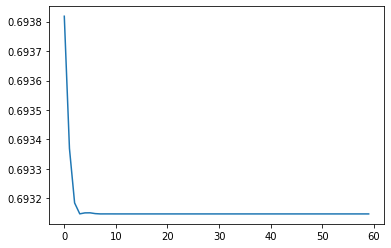

In [75]:
q2 = Q()
data = create_dataset_guess(10**3, 10)
opt = tf.keras.optimizers.Adam(lr=10**-4)
l=[]
N = 60
for ep in range(N):
    l.append(epocheando(data))
    if ep%(N/10) == 1:
        print(ep, "/", N)
plt.plot(l)

In [76]:
for outcome in [0.,1.]:
    print(np.argmax(np.squeeze(q2(np.array([[outcome]])))))

1
0


In [77]:
q2(np.array([[0.]]))

<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[0.5, 0.5]])>

In [78]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [79]:


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    

4423680/4422102 [==============================] - 1s 0us/step


In [80]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [82]:
train_images.shape

(60000, 28, 28)

In [124]:
class modelito(tf.keras.Model):
    def __init__(self):
        super(modelito,self).__init__()
        self.l1 = tf.keras.layers.Flatten(input_shape=((1,28,28)))
        #l1(np.array([[[1.,0.],[2.,3.]]]))
        self.l2 = tf.keras.layers.Dense(128)
        self.l3 =tf.keras.layers.Dense(10)
    def call(self, inpu):
        feat = self.l1(inpu)
        feat = tf.nn.relu(feat)
        feat = self.l2(feat)
        feat = self.l3(feat)
        return feat

In [125]:
opti = tf.keras.optimizers.Adam(lr=10**-3)

In [126]:
mod = modelito()

In [128]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [129]:
mod(np.expand_dims(train_images[0],axis=0))

<tf.Tensor: shape=(1, 10), dtype=float64, numpy=
array([[ 1.49088475,  1.59907642, -0.83359469,  1.15911976,  0.34774173,
        -0.05651318, -0.81876191,  0.64789741,  0.32424006,  0.71445781]])>

In [148]:
mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [150]:
mod.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.5429 - accuracy: 0.8125
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4580 - accuracy: 0.8411
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4412 - accuracy: 0.8466
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4331 - accuracy: 0.8494
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4259 - accuracy: 0.8514
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4189 - accuracy: 0.8526
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4143 - accuracy: 0.8549
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4103 - accuracy: 0.8552
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4046 - accuracy: 0.8578
Epoch 10/10
60